## Summarize dataset characteristics

The dataset, titled "Google Play Store Apps," is acquired from the Kaggle Dataset Platform through the provided link: https://www.kaggle.com/datasets/lava18/google-play-store-apps/data. 

It contains web-scraped data from 10,000 Play Store applications, intended for the analysis of the Android market. The data has been extracted from the Google Play Store through web scraping. The dataset's creator/publisher believes that the Play Store apps data has enormous potential to drive app-making businesses to success, therefore, developers can extract actionable insights from this dataset to enhance the app creation strategies and tap into the Android market. 

This work is licensed under the Creative Commons Attribution 3.0 Unported License. To view a copy of this license, you can visit http://creativecommons.org/licenses/by/3.0/. Users are freely allowed to:

* Share — copy and redistribute the material in any medium or format for any purpose, even commercially.
* Adapt — remix, transform, and build upon the material for any purpose, even commercially.

File Size (9.03 MB):
Inside the folder, this dataset contains two separate csv files:
1. googleplaystore.csv (1.36 MB)
    Dataset size: 10,842 rows (1 app/row) x 13 columns
    - App Name(Text) - Application Name
    - Category(Categorical Text) - Category the app belongs to
    - Rating(Float) - Overall user rating of the app
    - Reviews(Integer) - Number of user reviews for the app
    - Size(Numeric) - Size of the app
    - Installs(Numeric) - Number of user downloads/installs for the app
    - Type(Categorical Text) - Paid/Free
    - Price(Float/Integer) - Price of the app
    - Content Rating(Categorical Text) - Age group the app is targeted at
    - Genres(Categorical Text) - Different types of genres that an app belongs to
    - Last Updated(Date) - updated time
    - Current Ver(Text data type) - current version number
    - Android Ver(Text data type) - android version number
2. googleplaystore_user_reviews.csv (7.67 MB)
    - App(Text)  - Name of app
    - Translated_Review(Text)  - User review (Preprocessed and translated to English)
    - Sentiment(Categorical Text) - Positive/Negative/Neutral (Preprocessed)
    - Sentiment_Polarity(Float & None Type) - Sentiment polarity score
    - Sentiment_Subjectivity(Float & None Type) - Sentiment subjectivity score

For this study, we will mainly focus on the analysis of first dataset: googleplaystore.csv. Inside the dataset, we will conduct a deep investigation of the first 10-column features.

In [2]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns # for making plots with seaborn

import ipywidgets as widgets

In [3]:
full_df=pd.read_csv("./archive/googleplaystore.csv")
full_df=full_df.iloc[:,:10]
full_df.shape

(10841, 10)

### proprocessing step 1: remove unexpected Category value

In [4]:
full_df=full_df[full_df['Category']!='1.9'] #reason: Category cannot be a float
full_df.shape

(10840, 10)

### proprocessing step 2: remove nan from any existing rows (mainly for removing nan in Rating column)

In [5]:
full_df=full_df.dropna(axis='rows')
full_df.shape

(9366, 10)

In [6]:
full_df['Reviews']=full_df['Reviews'].astype(float)
full_df['Rating']=full_df['Rating'].astype(float)
full_df['Price']=full_df['Price'].str.replace('$','').astype(float)

/var/folders/cg/jfvgjw497pjggntffqq2xqn80000gn/T/ipykernel_51609/1644631932.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  full_df['Price']=full_df['Price'].str.replace('$','').astype(float)


### Analysis

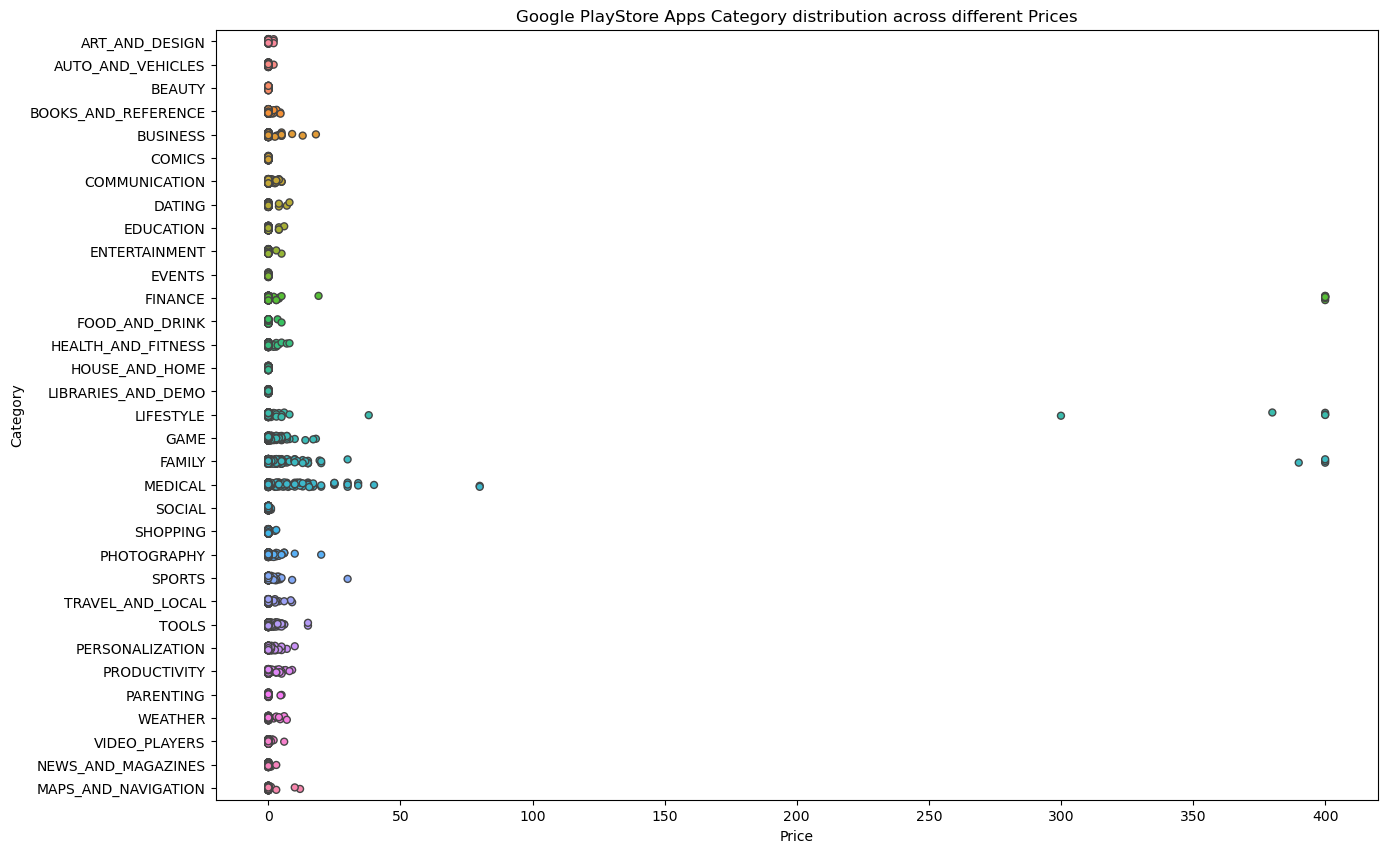

In [7]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
p = sns.stripplot(x="Price", y="Category", data=full_df, jitter=True, linewidth=1)
title = ax.set_title('Google PlayStore Apps Category distribution across different Prices')


#### Removing apps greater than 10 dollars

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


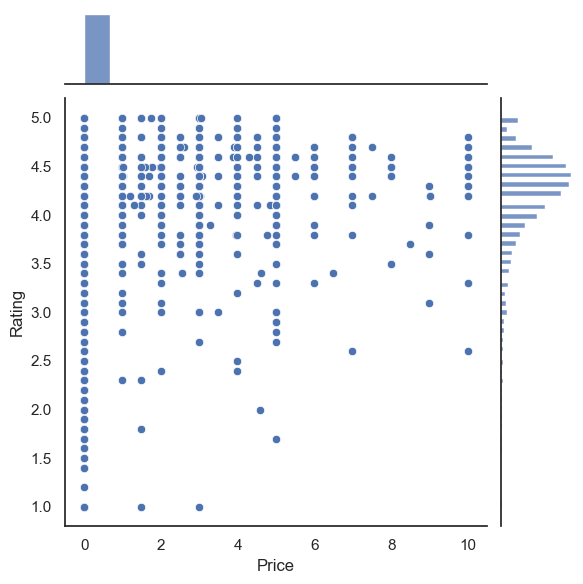

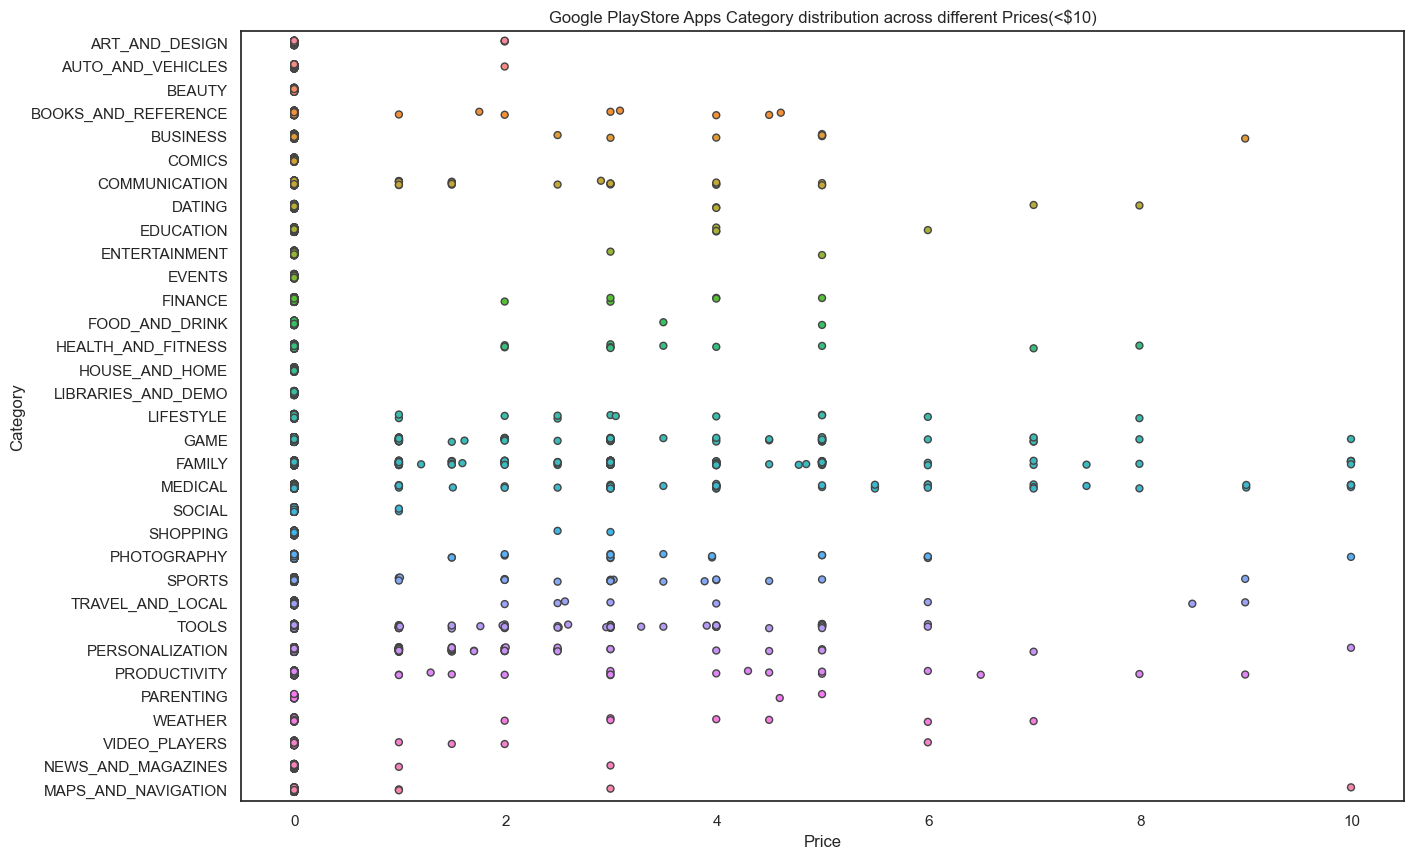

In [52]:
filtered_df=full_df[full_df['Price']<10]
p = sns.jointplot( "Price", "Rating", filtered_df)
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
p = sns.stripplot(x="Price", y="Category", data=filtered_df, jitter=True, linewidth=1)
title = ax.set_title('Google PlayStore Apps Category distribution across different Prices(<$10)')


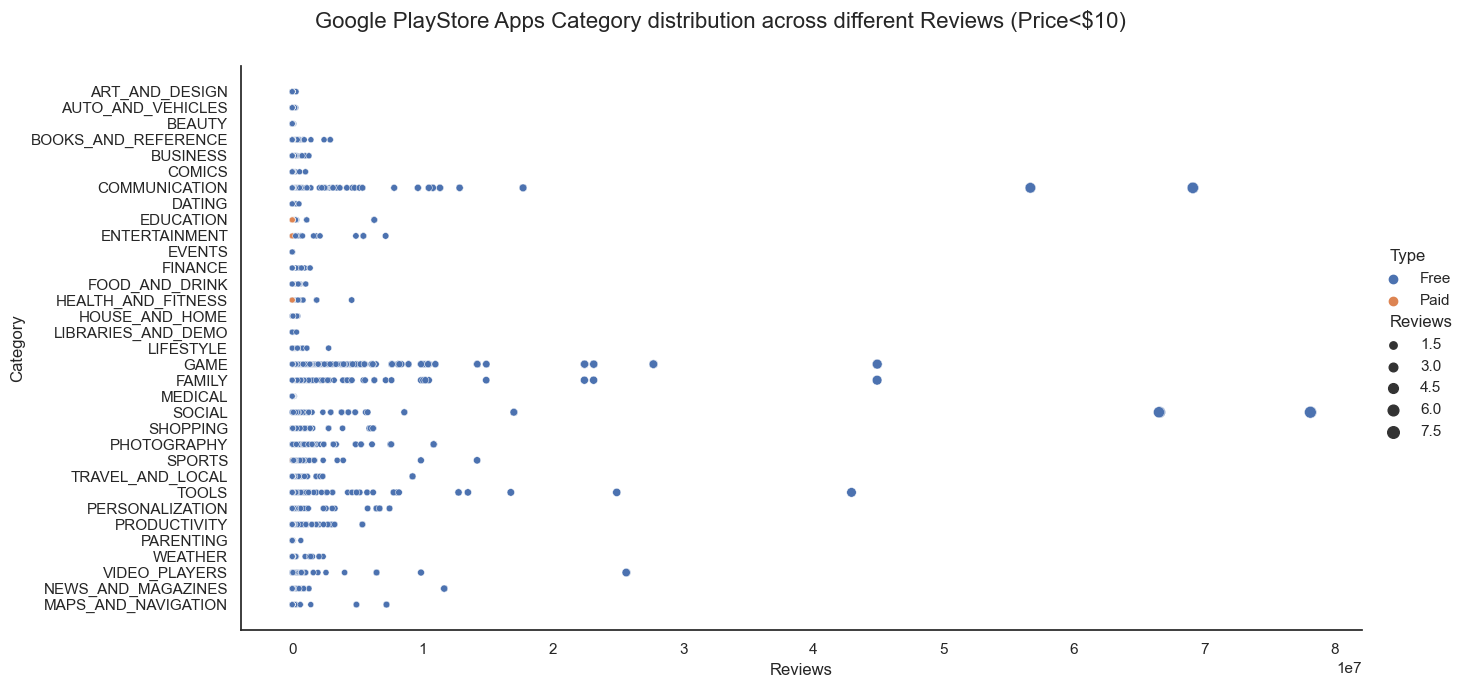

In [53]:
# Apply the default theme
sns.set_theme(style="white")

p2=sns.relplot(data=filtered_df, x="Reviews", y="Category", hue="Type", size="Reviews", height=7, aspect=2)
p2.fig.suptitle('Google PlayStore Apps Category distribution across different Reviews (Price<$10)', fontsize=16)
p2.fig.subplots_adjust(top=0.9);
plt.show()